In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("datasetengineer/logistics-and-supply-chain-dataset")

print("Path to dataset files:", path)

100%|██████████| 6.89M/6.89M [00:02<00:00, 3.59MB/s]

Extracting files...


Path to dataset files: C:\Users\asifi\.cache\kagglehub\datasets\datasetengineer\logistics-and-supply-chain-dataset\versions\1


# Exploratory Data Analysis (EDA)
## Risk-Aware Material Allocation Across Multi-Plant Supply Chains


### Objective of EDA
This EDA aims to understand:
1. Demand & inventory patterns (`historical_demand`, `warehouse_inventory_level`)
2. Cost & lead-time behavior (`shipping_costs`, `lead_time_days`, delays)
3. Operational bottlenecks (`traffic_congestion_level`, `port_congestion_level`, `customs_clearance_time`)
4. Risk signals and their relationship to delays/service outcomes
   (`route_risk_level`, `weather_condition_severity`, `disruption_likelihood_score`, `delay_probability`, `risk_classification`)
5. Data quality issues: missing values, outliers, inconsistent categories.


In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")
sns.set_context("notebook")
pd.set_option("display.max_columns", 200)


In [3]:
file_path = "dynamic_supply_chain_logistics_dataset.csv"
df = pd.read_csv(file_path)
print("Shape:", df.shape)
df.head()


Shape: (32065, 26)


,timestamp,vehicle_gps_latitude,vehicle_gps_longitude,fuel_consumption_rate,eta_variation_hours,traffic_congestion_level,warehouse_inventory_level,loading_unloading_time,handling_equipment_availability,order_fulfillment_status,weather_condition_severity,port_congestion_level,shipping_costs,supplier_reliability_score,lead_time_days,historical_demand,iot_temperature,cargo_condition_status,route_risk_level,customs_clearance_time,driver_behavior_score,fatigue_monitoring_score,disruption_likelihood_score,delay_probability,risk_classification,delivery_time_deviation
0,2021-01-01 00:00:00,40.375568,-77.014318,5.136512,4.998009,5.927586,985.716862,4.951392,0.481294,0.761166,0.359066,4.289160,456.503853,0.986064,2.128009,100.772854,0.574400,0.777263,1.182116,0.502006,0.033843,0.978599,0.506152,0.885291,Moderate Risk,9.110682
1,2021-01-01 01:00:00,33.507818,-117.036902,5.101512,0.984929,1.591992,396.700206,1.030379,0.620780,0.196594,0.230660,7.018373,640.408205,0.463233,12.608166,5313.738114,-9.753493,0.091839,9.611988,0.966774,0.201725,0.918586,0.980784,0.544178,High Risk,8.175281
2,2021-01-01 02:00:00,30.020640,-75.269224,5.090803,4.972665,8.787765,832.408935,4.220229,0.810933,0.152742,0.027210,9.605064,155.749314,0.598561,14.124452,1595.049146,-6.491034,0.253529,6.570431,0.945627,0.264045,0.394215,0.998633,0.803322,High Risk,1.283594
3,2021-01-01 03:00:00,36.649223,-70.190529,8.219558,3.095064,0.045257,0.573283,0.530186,0.008525,0.811885,0.616619,8.899616,104.317961,0.742735,3.818972,2530.431941,-0.151276,0.877576,0.548952,4.674035,0.362885,0.905444,0.993320,0.025977,High Risk,9.304897
4,2021-01-01 04:00:00,30.001279,-70.012195,5.000075,3.216077,8.004851,914.925067,3.620890,0.020083,0.053659,0.952385,0.061760,977.222528,0.431088,14.001491,2146.190197,2.429448,0.262081,8.861443,3.445429,0.016957,0.258702,0.912433,0.991122,High Risk,7.752484


In [4]:
df.columns.tolist()


['timestamp',
 'vehicle_gps_latitude',
 'vehicle_gps_longitude',
 'fuel_consumption_rate',
 'eta_variation_hours',
 'traffic_congestion_level',
 'warehouse_inventory_level',
 'loading_unloading_time',
 'handling_equipment_availability',
 'order_fulfillment_status',
 'weather_condition_severity',
 'port_congestion_level',
 'shipping_costs',
 'supplier_reliability_score',
 'lead_time_days',
 'historical_demand',
 'iot_temperature',
 'cargo_condition_status',
 'route_risk_level',
 'customs_clearance_time',
 'driver_behavior_score',
 'fatigue_monitoring_score',
 'disruption_likelihood_score',
 'delay_probability',
 'risk_classification',
 'delivery_time_deviation']

# Dataset Overview

In [5]:
df.shape


(32065, 26)

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32065 entries, 0 to 32064
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   timestamp                        32065 non-null  object 
 1   vehicle_gps_latitude             32065 non-null  float64
 2   vehicle_gps_longitude            32065 non-null  float64
 3   fuel_consumption_rate            32065 non-null  float64
 4   eta_variation_hours              32065 non-null  float64
 5   traffic_congestion_level         32065 non-null  float64
 6   warehouse_inventory_level        32065 non-null  float64
 7   loading_unloading_time           32065 non-null  float64
 8   handling_equipment_availability  32065 non-null  float64
 9   order_fulfillment_status         32065 non-null  float64
 10  weather_condition_severity       32065 non-null  float64
 11  port_congestion_level            32065 non-null  float64
 12  shipping_costs    

**Explanation:**
- `shape` gives the number of rows and columns.
- `info()` helps identify data types, missing values, and categorical vs numerical fields.
This step is critical before any cleaning or modeling.


# Column Description & Interpretation

In [7]:
df.columns


Index(['timestamp', 'vehicle_gps_latitude', 'vehicle_gps_longitude',
       'fuel_consumption_rate', 'eta_variation_hours',
       'traffic_congestion_level', 'warehouse_inventory_level',
       'loading_unloading_time', 'handling_equipment_availability',
       'order_fulfillment_status', 'weather_condition_severity',
       'port_congestion_level', 'shipping_costs', 'supplier_reliability_score',
       'lead_time_days', 'historical_demand', 'iot_temperature',
       'cargo_condition_status', 'route_risk_level', 'customs_clearance_time',
       'driver_behavior_score', 'fatigue_monitoring_score',
       'disruption_likelihood_score', 'delay_probability',
       'risk_classification', 'delivery_time_deviation'],
      dtype='object')

# Missing Value Analysis

In [8]:
missing = df.isna().sum().sort_values(ascending=False)
missing_pct = (missing / len(df) * 100).round(2)

missing_table = pd.DataFrame({"missing_count": missing, "missing_pct": missing_pct})
missing_table[missing_table["missing_count"] > 0]


,missing_count,missing_pct


# Duplicate Records Check

In [9]:
dup_count = df.duplicated().sum()
dup_count

0

# Parse timestamp + create time features

In [10]:
df["timestamp"] = pd.to_datetime(df["timestamp"], errors="coerce")

df["date"] = df["timestamp"].dt.date
df["hour"] = df["timestamp"].dt.hour
df["dayofweek"] = df["timestamp"].dt.dayofweek  # Mon=0
df["month"] = df["timestamp"].dt.month

df[["timestamp","date","hour","dayofweek","month"]].head()


,timestamp,date,hour,dayofweek,month
0,2021-01-01 00:00:00,2021-01-01,0,4,1
1,2021-01-01 01:00:00,2021-01-01,1,4,1
2,2021-01-01 02:00:00,2021-01-01,2,4,1
3,2021-01-01 03:00:00,2021-01-01,3,4,1
4,2021-01-01 04:00:00,2021-01-01,4,4,1


# Descriptive Statistics (Numerical Features)

In [11]:
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("Numeric columns:", len(num_cols))
print("Categorical columns:", len(cat_cols))
num_cols, cat_cols


Numeric columns: 27
Categorical columns: 3


(['vehicle_gps_latitude',
  'vehicle_gps_longitude',
  'fuel_consumption_rate',
  'eta_variation_hours',
  'traffic_congestion_level',
  'warehouse_inventory_level',
  'loading_unloading_time',
  'handling_equipment_availability',
  'order_fulfillment_status',
  'weather_condition_severity',
  'port_congestion_level',
  'shipping_costs',
  'supplier_reliability_score',
  'lead_time_days',
  'historical_demand',
  'iot_temperature',
  'cargo_condition_status',
  'route_risk_level',
  'customs_clearance_time',
  'driver_behavior_score',
  'fatigue_monitoring_score',
  'disruption_likelihood_score',
  'delay_probability',
  'delivery_time_deviation',
  'hour',
  'dayofweek',
  'month'],
 ['timestamp', 'risk_classification', 'date'])

**Explanation:**
Descriptive statistics help understand:
- Demand volatility
- Inventory imbalance
- Cost ranges
- Lead-time uncertainty
These insights directly inform optimization constraints.


In [12]:
df[num_cols].describe().T


,count,mean,std,min,25%,50%,75%,max
vehicle_gps_latitude,32065.0,38.023589,6.917909,3.000000e+01,31.280550,36.413820,44.453655,50.000000
vehicle_gps_longitude,32065.0,-90.116648,17.369244,-1.200000e+02,-106.253913,-86.293414,-73.079367,-70.000000
fuel_consumption_rate,32065.0,8.011735,4.264960,5.000000e+00,5.019984,5.636036,9.669944,19.999875
eta_variation_hours,32065.0,2.893068,2.274044,-1.999993e+00,1.185744,3.882059,4.884355,5.000000
traffic_congestion_level,32065.0,4.991493,3.532048,1.091633e-09,1.474720,4.981244,8.534902,9.999999
warehouse_inventory_level,32065.0,299.254732,323.443513,1.322210e-12,16.051635,157.288022,540.597991,999.999298
loading_unloading_time,32065.0,2.291669,1.554202,5.000000e-01,0.774798,1.917121,3.734188,5.000000
handling_equipment_availability,32065.0,0.302695,0.325915,4.565769e-16,0.017108,0.159515,0.553595,0.999999
order_fulfillment_status,32065.0,0.600740,0.345672,1.317764e-06,0.277096,0.680553,0.938160,1.000000
weather_condition_severity,32065.0,0.497608,0.353285,4.536949e-09,0.144014,0.496178,0.849823,1.000000


# Categorical value counts (important for status/risk labels)

In [13]:
for c in ["order_fulfillment_status", "cargo_condition_status", "risk_classification"]:
    if c in df.columns:
        print("\n", c)
        display(df[c].value_counts(dropna=False).head(20))



 order_fulfillment_status


order_fulfillment_status
0.761166    1
0.968104    1
0.930171    1
0.010665    1
0.981872    1
0.899859    1
0.815574    1
0.407863    1
0.878505    1
0.714488    1
0.240462    1
0.972483    1
0.000799    1
0.367567    1
0.999985    1
0.253014    1
0.429749    1
0.893628    1
0.608562    1
0.458713    1
Name: count, dtype: int64


 cargo_condition_status


cargo_condition_status
0.777263    1
0.135876    1
0.916985    1
0.107940    1
0.020174    1
0.562659    1
0.420539    1
0.731548    1
0.073032    1
0.000760    1
0.001554    1
0.602349    1
0.366849    1
0.372337    1
0.956534    1
0.000651    1
0.347580    1
0.023333    1
0.423834    1
0.062935    1
Name: count, dtype: int64


 risk_classification


risk_classification
High Risk        23944
Moderate Risk     5011
Low Risk          3110
Name: count, dtype: int64

**Why this matters**
- `order_fulfillment_status` acts like a service-level proxy.
- `risk_classification` is a ready-made label you can compare against your own risk scoring later.


# Distribution plots for key variables

c:\Users\asifi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


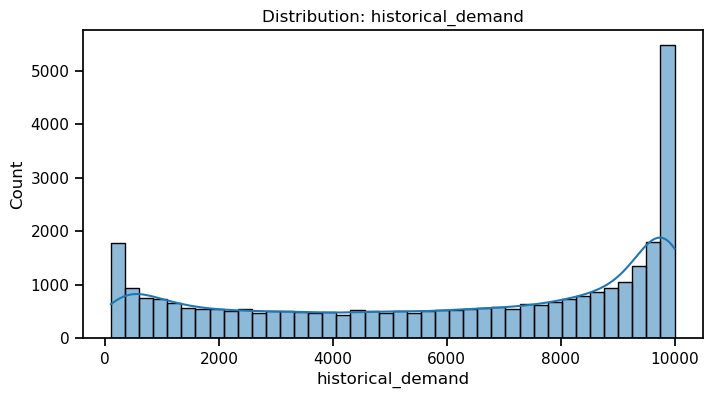

c:\Users\asifi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


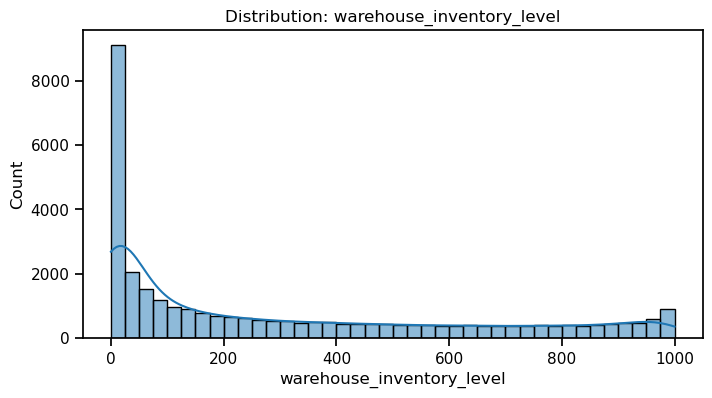

c:\Users\asifi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


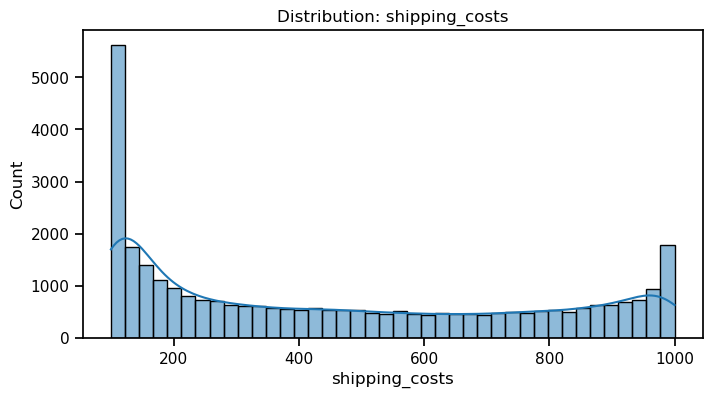

c:\Users\asifi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


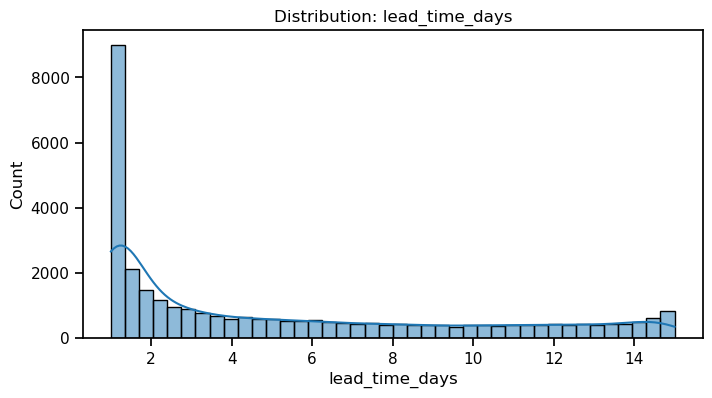

c:\Users\asifi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


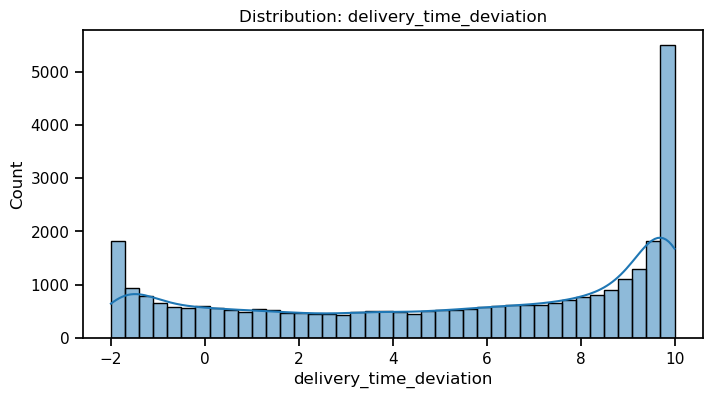

c:\Users\asifi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


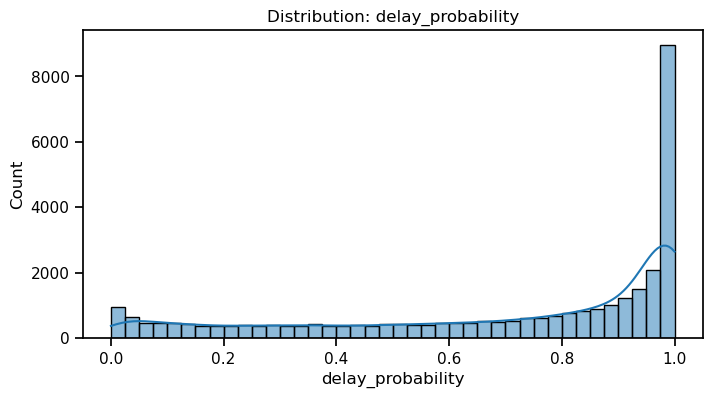

c:\Users\asifi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


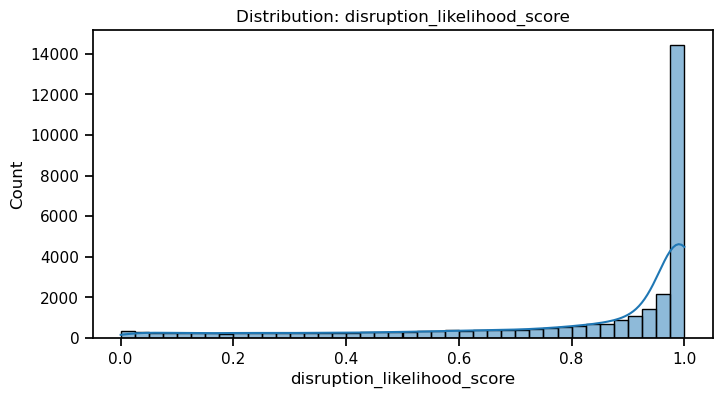

c:\Users\asifi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


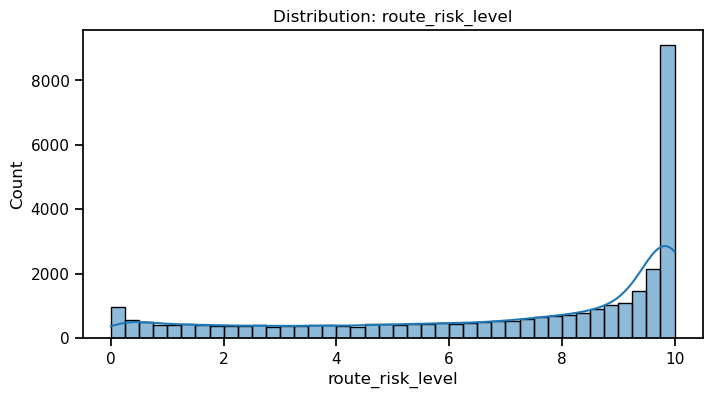

c:\Users\asifi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


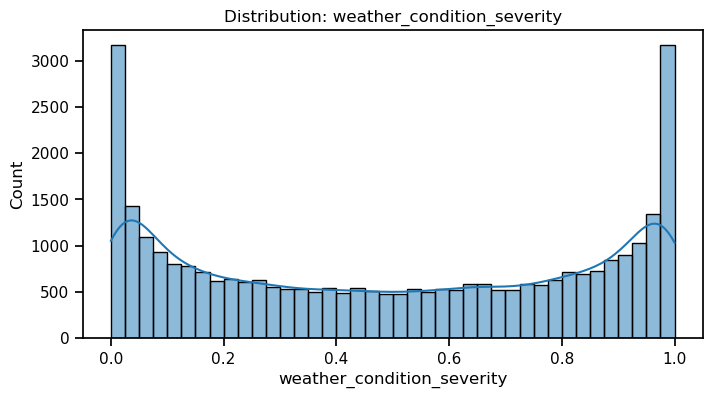

c:\Users\asifi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


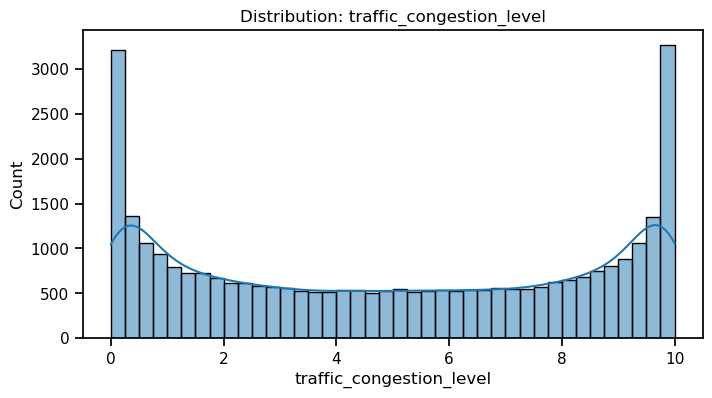

c:\Users\asifi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


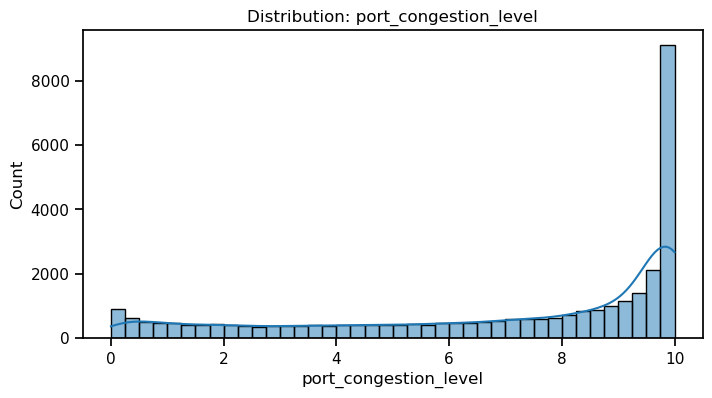

In [14]:
key_vars = [
    "historical_demand",
    "warehouse_inventory_level",
    "shipping_costs",
    "lead_time_days",
    "delivery_time_deviation",
    "delay_probability",
    "disruption_likelihood_score",
    "route_risk_level",
    "weather_condition_severity",
    "traffic_congestion_level",
    "port_congestion_level"
]

for col in key_vars:
    if col in df.columns:
        plt.figure(figsize=(8,4))
        sns.histplot(df[col].dropna(), bins=40, kde=True)
        plt.title(f"Distribution: {col}")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.show()


# Outlier scan using IQR

In [15]:
def iqr_outlier_summary(dataframe, cols):
    rows = []
    for col in cols:
        x = dataframe[col].dropna()
        if len(x) == 0:
            continue
        q1, q3 = x.quantile(0.25), x.quantile(0.75)
        iqr = q3 - q1
        lo, hi = q1 - 1.5*iqr, q3 + 1.5*iqr
        out = ((x < lo) | (x > hi)).mean() * 100
        rows.append([col, float(q1), float(q3), float(lo), float(hi), round(out, 2)])
    return pd.DataFrame(rows, columns=["col","q1","q3","lo","hi","outlier_%"]).sort_values("outlier_%", ascending=False)

iqr_outlier_summary(df, [c for c in key_vars if c in df.columns]).head(15)


,col,q1,q3,lo,hi,outlier_%
6,disruption_likelihood_score,0.693739,0.998746,0.236229,1.456255,7.78
0,historical_demand,2822.607616,9374.252913,-7004.860330,19201.720858,0.00
1,warehouse_inventory_level,16.051635,540.597991,-770.767899,1327.417525,0.00
2,shipping_costs,154.017124,753.007203,-744.467996,1651.492322,0.00
3,lead_time_days,1.237490,8.625720,-9.844856,19.708066,0.00
4,delivery_time_deviation,1.269197,9.249206,-10.700816,21.219219,0.00
5,delay_probability,0.456009,0.982391,-0.333564,1.771964,0.00
7,route_risk_level,4.593407,9.836152,-3.270710,17.700269,0.00
8,weather_condition_severity,0.144014,0.849823,-0.914700,1.908536,0.00
9,traffic_congestion_level,1.474720,8.534902,-9.115552,19.125174,0.00


**Interpretation**
Outliers in costs, delays, or demand can be real disruption events.
Instead of removing them blindly, we typically:
- cap/winsorize for modeling, and/or
- keep and treat them as disruption cases for risk analysis.


# Correlation heatmap

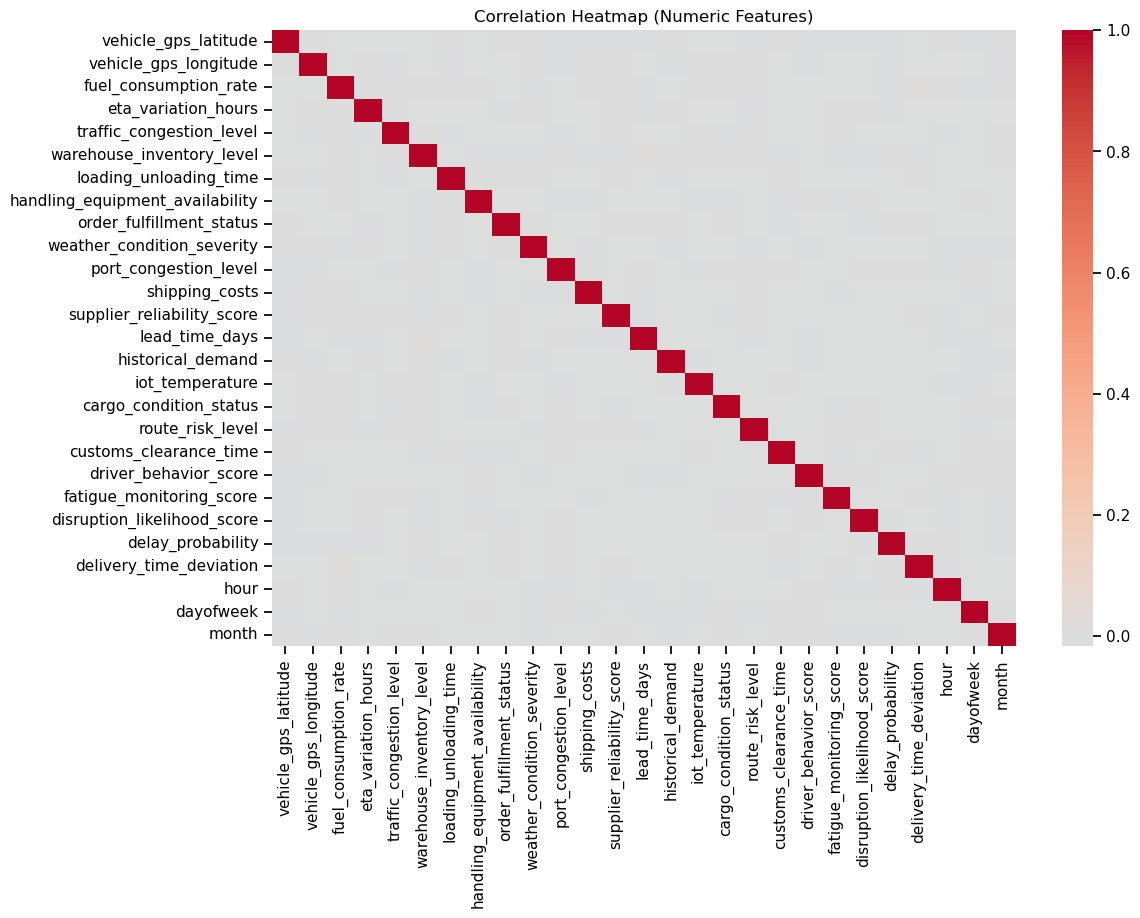

In [16]:
plt.figure(figsize=(12,8))
corr = df[num_cols].corr(numeric_only=True)
sns.heatmap(corr, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()


# Inventory vs demand relationship

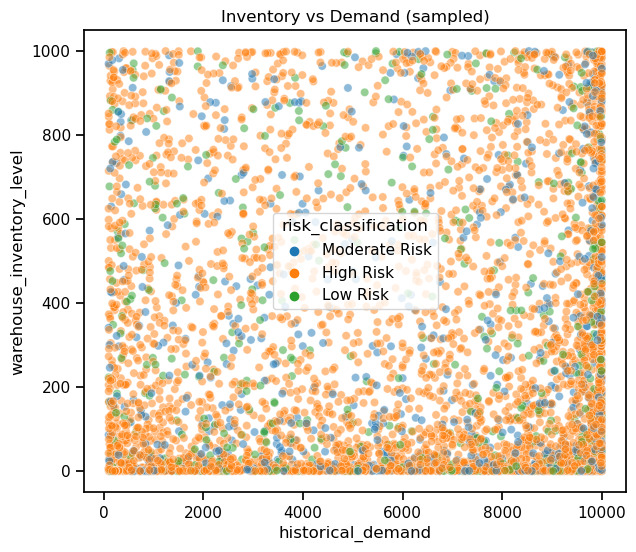

In [17]:
plt.figure(figsize=(7,6))
sns.scatterplot(
    data=df.sample(min(5000, len(df)), random_state=42),
    x="historical_demand",
    y="warehouse_inventory_level",
    hue="risk_classification" if "risk_classification" in df.columns else None,
    alpha=0.5
)
plt.title("Inventory vs Demand (sampled)")
plt.xlabel("historical_demand")
plt.ylabel("warehouse_inventory_level")
plt.show()


# Construct an “imbalance” feature (surplus/shortage proxy)

In [18]:
df["inventory_gap"] = df["warehouse_inventory_level"] - df["historical_demand"]

df["inventory_status"] = np.where(
    df["inventory_gap"] > 0, "Surplus",
    np.where(df["inventory_gap"] < 0, "Shortage", "Balanced")
)

df["inventory_status"].value_counts()


inventory_status
Shortage    30804
Surplus      1261
Name: count, dtype: int64

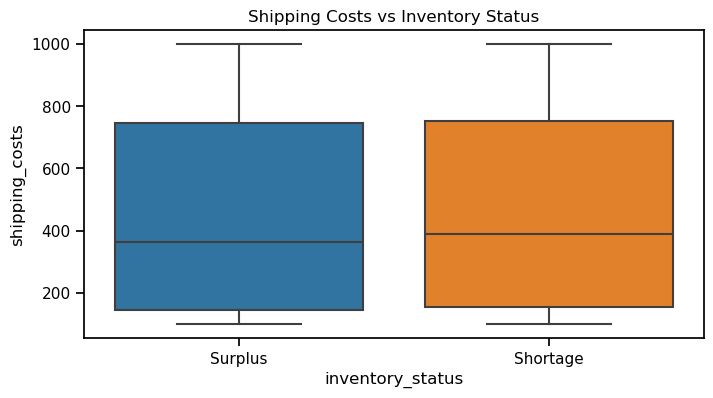

In [19]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="inventory_status", y="shipping_costs")
plt.title("Shipping Costs vs Inventory Status")
plt.show()


# Risk vs delay/service analysis

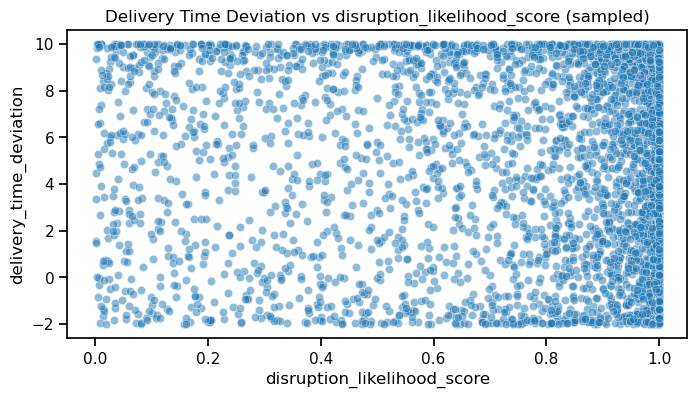

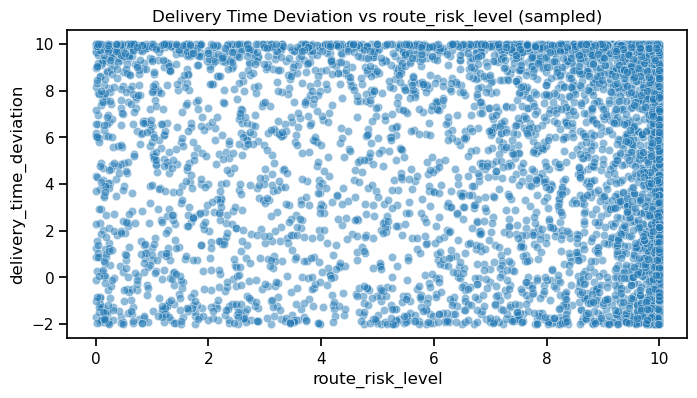

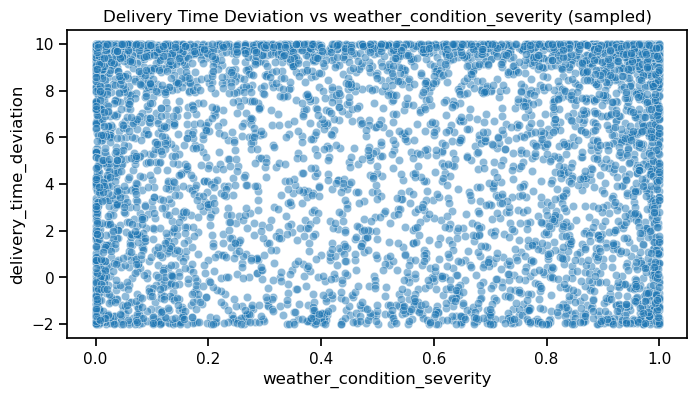

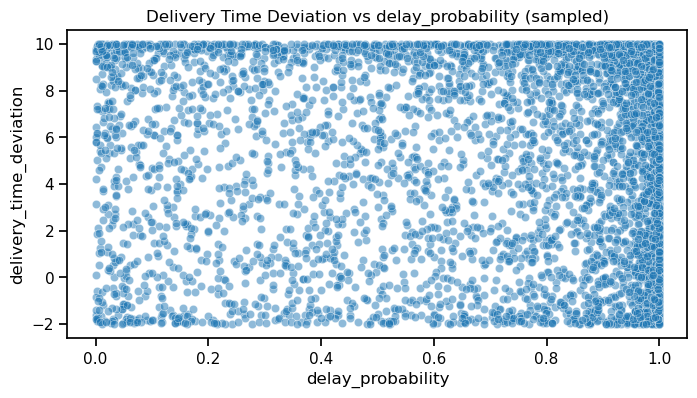

In [20]:
risk_vars = ["disruption_likelihood_score", "route_risk_level", "weather_condition_severity", "delay_probability"]

for rv in risk_vars:
    if rv in df.columns:
        plt.figure(figsize=(8,4))
        sns.scatterplot(
            data=df.sample(min(5000, len(df)), random_state=42),
            x=rv,
            y="delivery_time_deviation",
            alpha=0.5
        )
        plt.title(f"Delivery Time Deviation vs {rv} (sampled)")
        plt.xlabel(rv)
        plt.ylabel("delivery_time_deviation")
        plt.show()


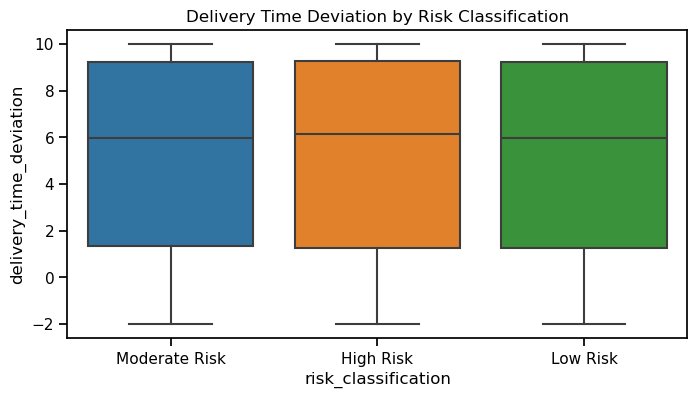

In [21]:
plt.figure(figsize=(8,4))
sns.boxplot(data=df, x="risk_classification", y="delivery_time_deviation")
plt.title("Delivery Time Deviation by Risk Classification")
plt.show()


# Time-based trends (demand, inventory, risk)

In [24]:
daily = df.groupby("date").agg(
    demand=("historical_demand","sum"),
    inventory=("warehouse_inventory_level","sum"),
    avg_delay=("delivery_time_deviation","mean"),
    avg_risk=("disruption_likelihood_score","mean"),
    avg_shipping_cost=("shipping_costs","mean")
).reset_index()

daily["date"] = pd.to_datetime(daily["date"])

daily.head()


,date,demand,inventory,avg_delay,avg_risk,avg_shipping_cost
0,2021-01-01,146105.722646,7237.843269,5.629205,0.855860,400.038948
1,2021-01-02,180336.393089,8914.122309,5.897185,0.919868,565.635388
2,2021-01-03,151003.300428,6142.809277,5.165200,0.852160,487.533988
3,2021-01-04,128532.827740,8205.377923,5.478182,0.730925,343.179154
4,2021-01-05,155817.199511,6919.012092,4.698579,0.788526,382.974045


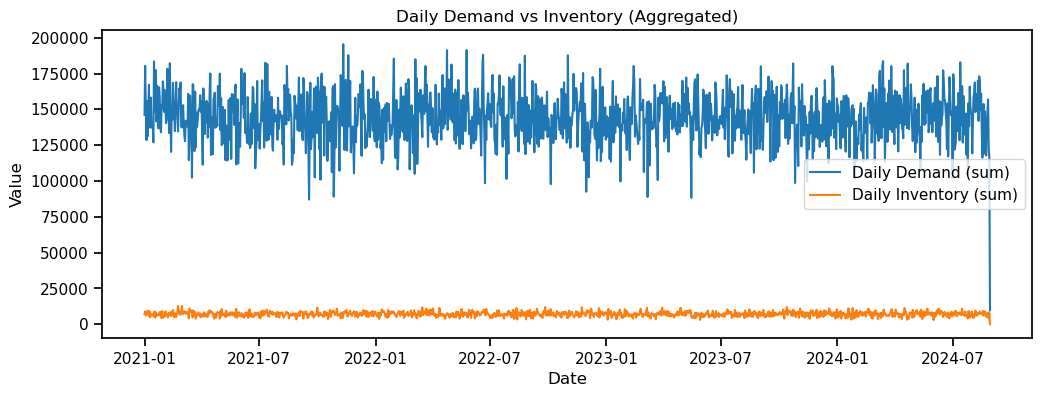

In [25]:
plt.figure(figsize=(12,4))
plt.plot(daily["date"], daily["demand"], label="Daily Demand (sum)")
plt.plot(daily["date"], daily["inventory"], label="Daily Inventory (sum)")
plt.title("Daily Demand vs Inventory (Aggregated)")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


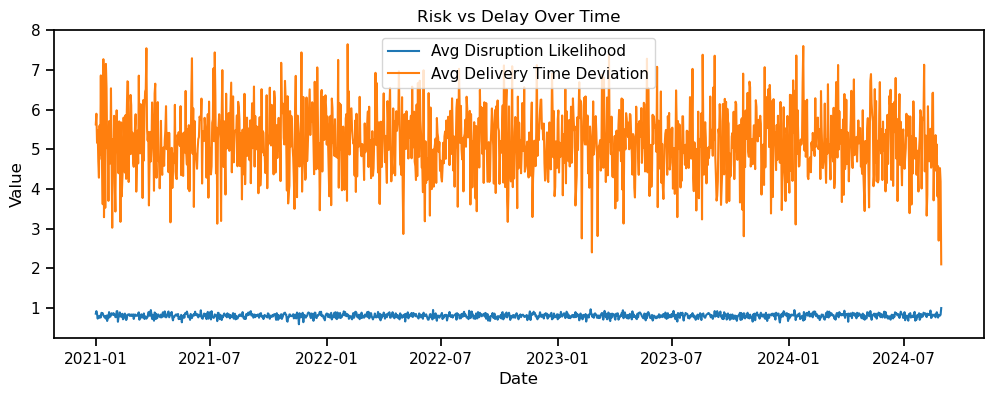

In [32]:
plt.figure(figsize=(12,4))
plt.plot(daily["date"], daily["avg_risk"], label="Avg Disruption Likelihood")
plt.plot(daily["date"], daily["avg_delay"], label="Avg Delivery Time Deviation")
plt.title("Risk vs Delay Over Time")
plt.xlabel("Date")
plt.ylabel("Value")
plt.legend()
plt.show()


## EDA Conclusion

This exploratory analysis confirms that the supply chain exhibits:
- Significant demand–inventory mismatches across time
- High variability in logistics delays and shipping costs
- Strong association between disruption risk indicators and delivery performance
- Observable trade-offs between cost efficiency and risk exposure

These findings justify the need for a proactive, risk-aware allocation and decision-support framework,
which is developed in the subsequent forecasting and optimization stages of this project.


In [26]:
eda_df = df.copy()

# Optional: cap extreme outliers for modeling (NOT deleting)
for c in ["shipping_costs", "delivery_time_deviation", "historical_demand"]:
    q1 = eda_df[c].quantile(0.01)
    q99 = eda_df[c].quantile(0.99)
    eda_df[c] = eda_df[c].clip(q1, q99)

eda_df.to_csv("eda_cleaned_supply_chain_data.csv", index=False)
